In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image
import networkx as nx
from matplotlib import cm
import math

%matplotlib notebook

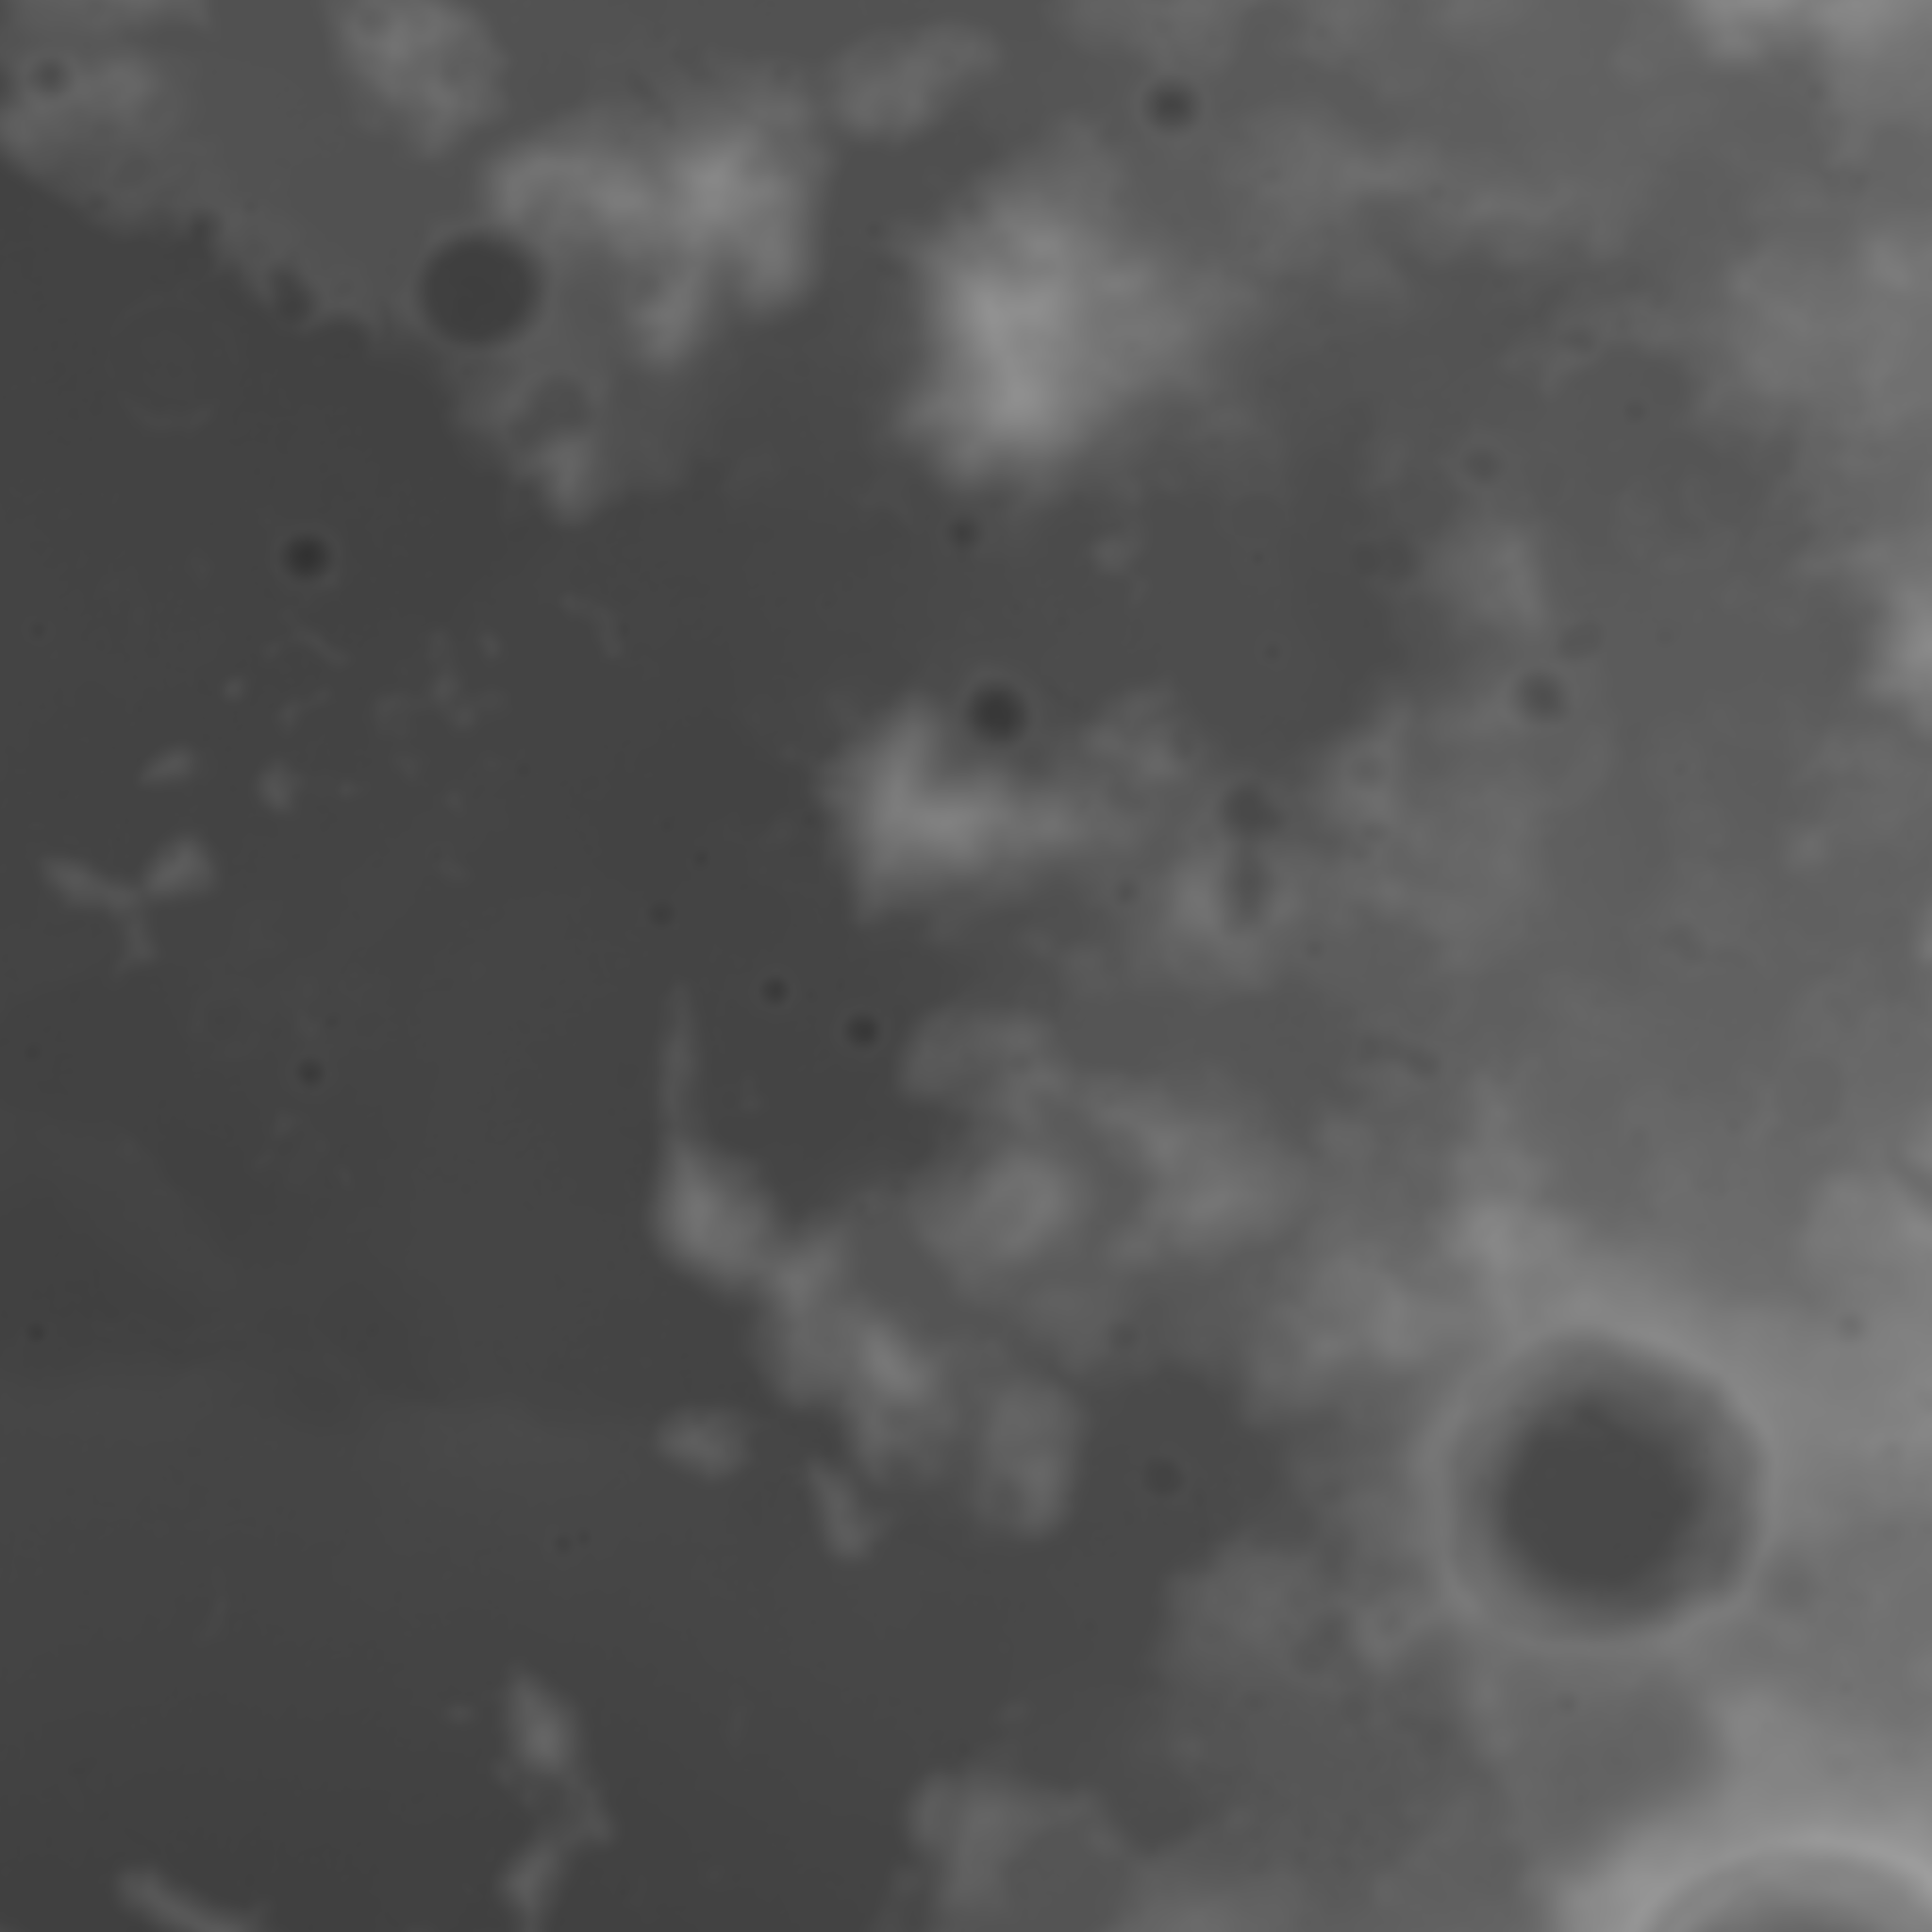

In [2]:
im = Image.open("assets/example1.png")
im = im.convert('L')
im

In [3]:
x, y = np.meshgrid(range(im.width), range(im.height))
x.shape, y.shape

((2048, 2048), (2048, 2048))

In [4]:
image_pixels = np.asarray(im)
z = np.asarray(im)
z.shape

(2048, 2048)

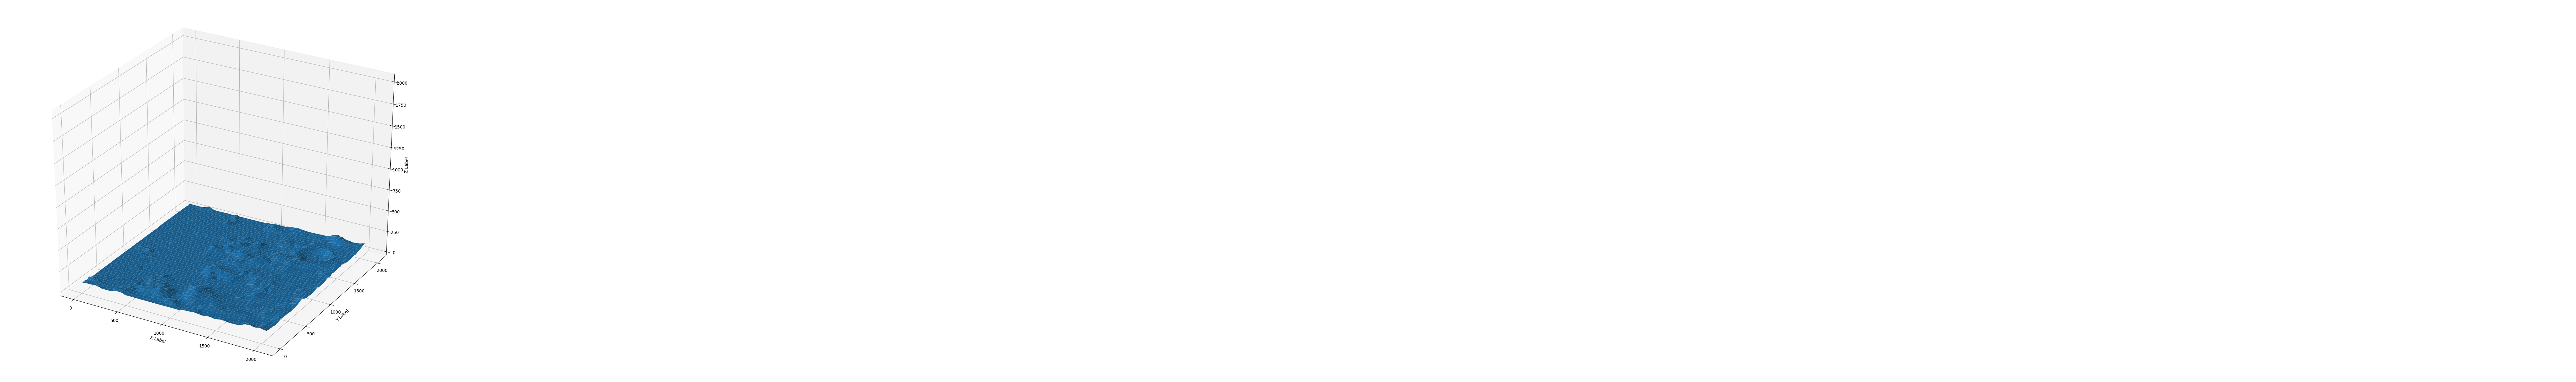

In [5]:
fig = plt.figure(figsize=(18, 16), dpi=100)

ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c='r', marker='o')
ax.plot_surface(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim(0, 2048)

plt.show()

In [77]:
np.min(image_pixels)

49

In [78]:
np.max(image_pixels)

158

In [112]:
def get_height(x, y):
    MAGIC_NUMBER = 100
    return image_pixels[x, y] * MAGIC_NUMBER

In [113]:
def get_weight(a_x, a_y, b_x, b_y):
    return math.sqrt((get_height(a_x, a_y) - get_height(b_x, b_y)) ** 2 +
                     ((b_x * 100 - a_x * 100) + (b_y * 100 - a_y * 100)) ** 2)

In [114]:
get_height(50, 50)

8800

In [115]:
get_height(51, 51)

8900

In [116]:
get_weight(50, 50, 51, 51)

223.60679774997897

In [117]:
def add_edge_with_weight(graph, a_x, a_y, b_x, b_y):
    weight = get_weight(a_x * SCALE, a_y * SCALE, b_x * SCALE, b_y * SCALE)
    graph.add_edge('{}_{}'.format(a_x, a_y), '{}_{}'.format(b_x, b_y), weight=weight)

In [118]:
SCALE = 8
N = int(2048 / SCALE)
graph = nx.DiGraph()
for _y in range(1, N - 1):
    for _x in range(1, N - 1):
        add_edge_with_weight(graph, _x, _y, _x + 1, _y)
        add_edge_with_weight(graph, _x + 1, _y, _x, _y)
        add_edge_with_weight(graph, _x, _y, _x, _y + 1)
        add_edge_with_weight(graph, _x, _y + 1, _x, _y)

In [119]:
def get_path(graph, point_a, point_b):
    source_a = '{}_{}'.format(int(point_a[0] / SCALE), int(point_a[1] / SCALE))
    source_b = '{}_{}'.format(int(point_b[0] / SCALE), int(point_b[1] / SCALE))
    path = nx.dijkstra_path(graph, source_a, source_b)
    return [(int(entry.split('_')[0]) * SCALE, int(entry.split('_')[1]) * SCALE) for entry in path]

In [120]:
path = get_path(graph, (500, 500), (1800, 2000))
path

[(496, 496),
 (504, 496),
 (512, 496),
 (520, 496),
 (528, 496),
 (536, 496),
 (544, 496),
 (552, 496),
 (560, 496),
 (568, 496),
 (576, 496),
 (584, 496),
 (592, 496),
 (600, 496),
 (608, 496),
 (616, 496),
 (624, 496),
 (632, 496),
 (640, 496),
 (648, 496),
 (656, 496),
 (664, 496),
 (672, 496),
 (680, 496),
 (688, 496),
 (696, 496),
 (704, 496),
 (712, 496),
 (720, 496),
 (720, 504),
 (720, 512),
 (720, 520),
 (720, 528),
 (720, 536),
 (728, 536),
 (728, 544),
 (736, 544),
 (744, 544),
 (752, 544),
 (760, 544),
 (768, 544),
 (776, 544),
 (784, 544),
 (792, 544),
 (792, 552),
 (792, 560),
 (800, 560),
 (808, 560),
 (808, 568),
 (816, 568),
 (824, 568),
 (832, 568),
 (840, 568),
 (848, 568),
 (856, 568),
 (864, 568),
 (872, 568),
 (880, 568),
 (888, 568),
 (896, 568),
 (904, 568),
 (912, 568),
 (920, 568),
 (928, 568),
 (936, 568),
 (936, 576),
 (936, 584),
 (936, 592),
 (936, 600),
 (936, 608),
 (936, 616),
 (936, 624),
 (936, 632),
 (944, 632),
 (952, 632),
 (960, 632),
 (968, 632),

In [121]:
path_x = np.array([point[0] for point in path])
path_y = np.array([point[1] for point in path])
path_z = np.array([image_pixels[point[0], point[1]] for point in path])

<IPython.core.display.Javascript object>


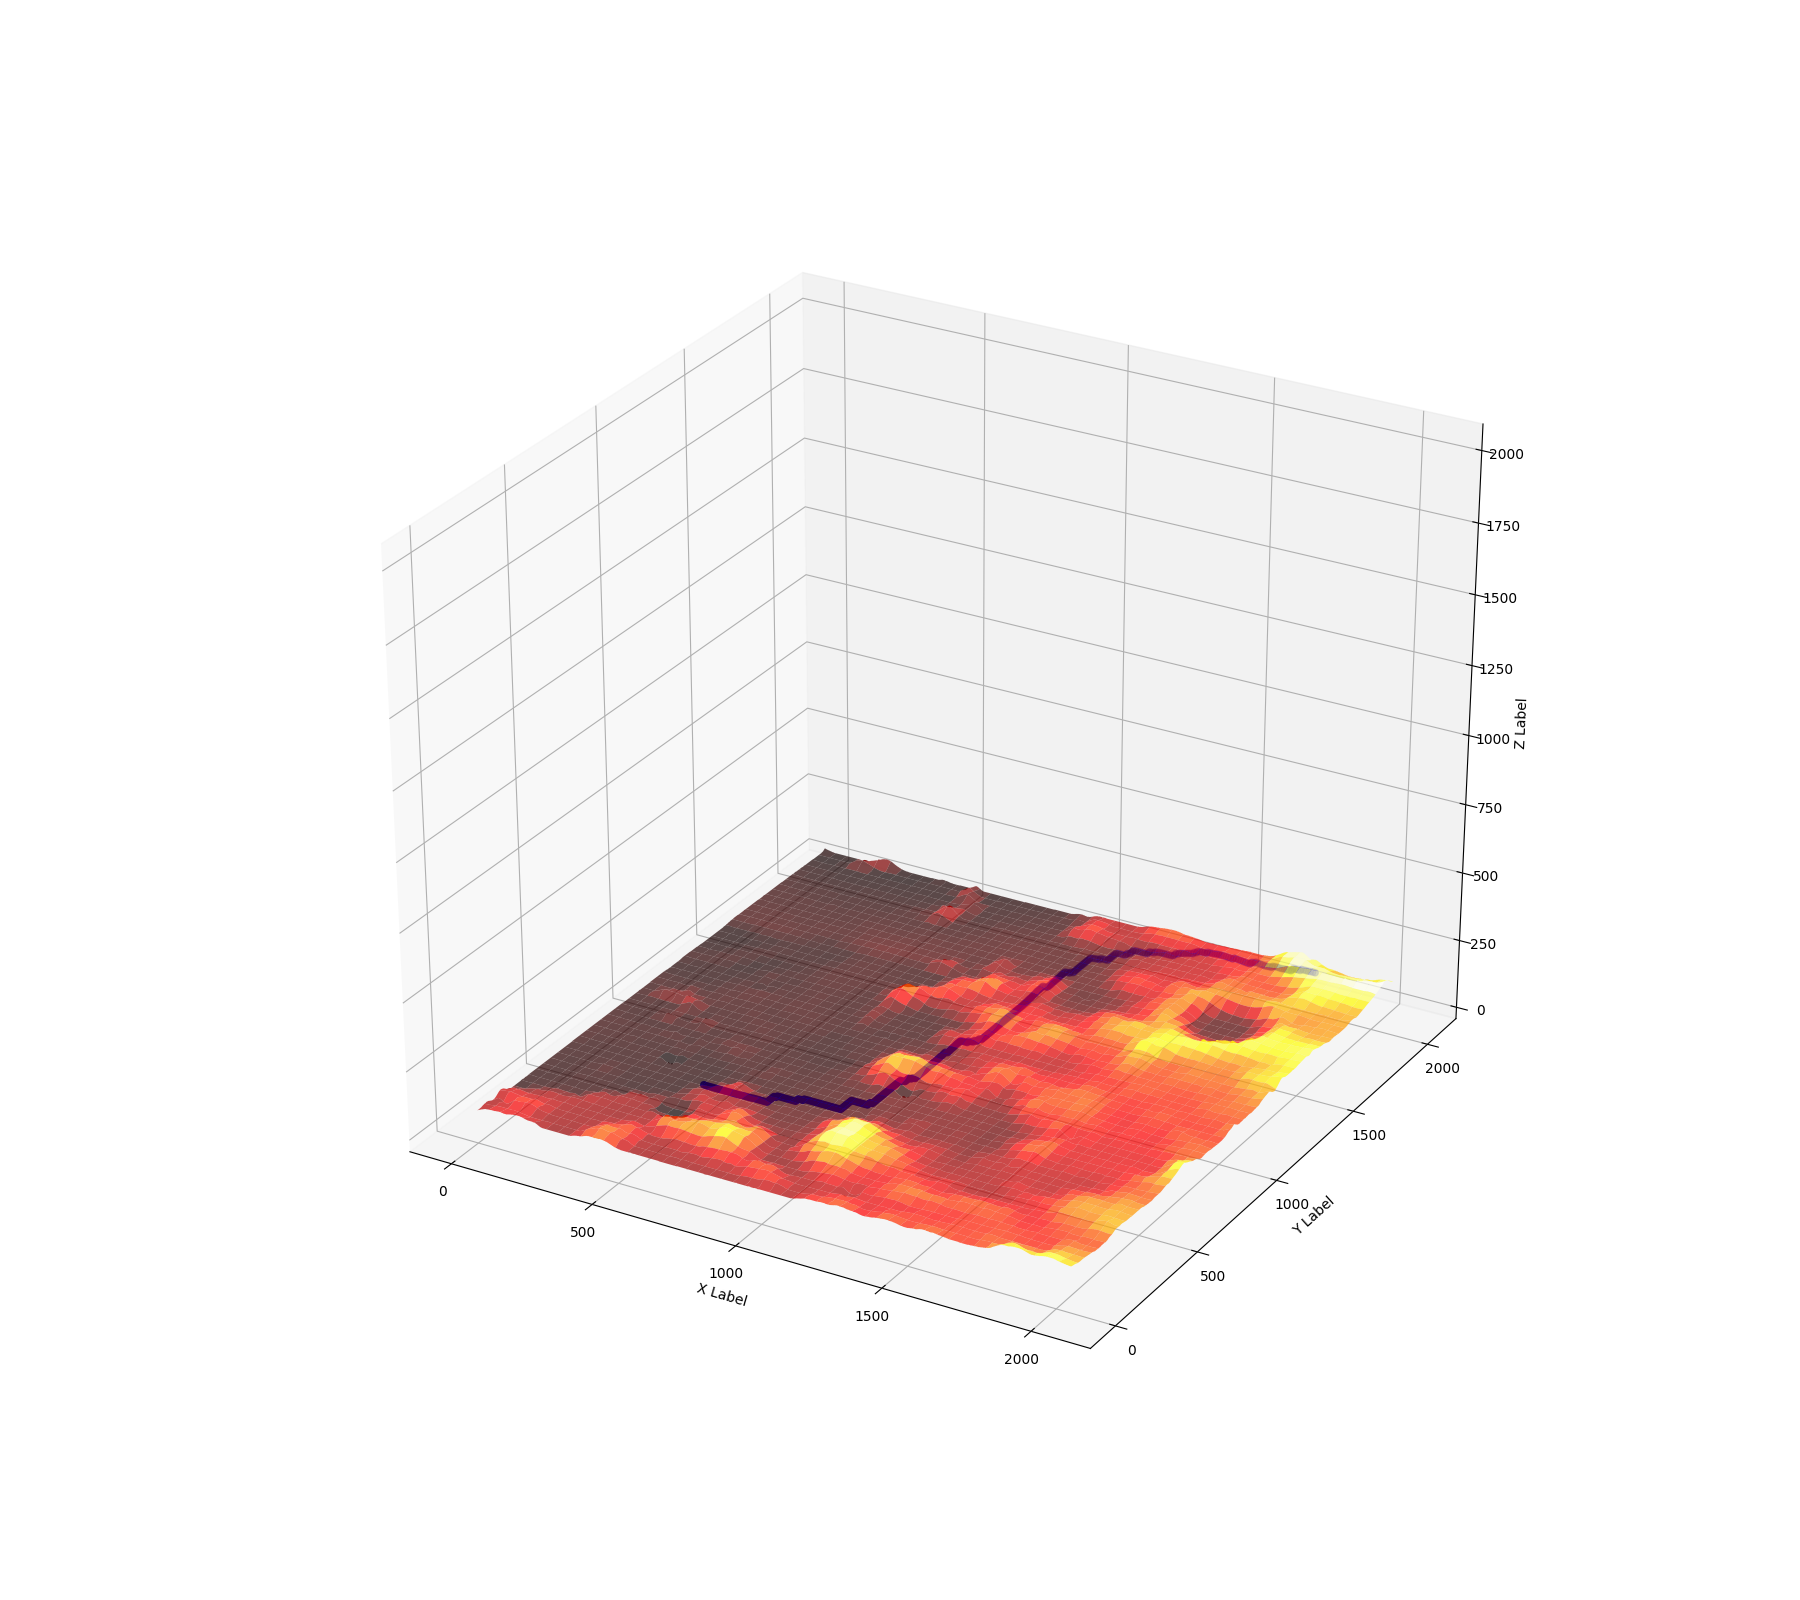

In [122]:
fig = plt.figure(figsize=(18, 16), dpi=50)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.7, cmap=cm.hot)
ax.scatter(path_x, path_y, path_z, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim(0, 2048)

plt.show()